# Assignment - Advance Regression
## Problem Description:-
A US-based housing company named Surprise Housing decided to enter Australian market and wants to purchase houses at a price below their actual values and flip them on at a higher price.The company has collected a data set from the sale of houses in Australia

## Requirement :-
The company is looking at prospective properties to buy to enter the market. Hence, there is a need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not

## Objective :-
The company wants to create a model that will be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

## Step 1: Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
df.shape

(1460, 81)

In [8]:
# Check for missing values

(df.isna().sum()/df.shape[0]*100).sort_values(ascending = False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [9]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

## Step 2: Data Cleaning

In [10]:
# Dropping fields which are having majority of values as Null
df = df.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [11]:
## Treating the NaN Values
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['Electrical'] = df['Electrical'].fillna("Other")

In [12]:
## Dropping the LotFontgage columns as it have more Null values
df.drop("LotFrontage",axis = 1, inplace=True)

In [13]:
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    df[col] = df[col].fillna('No_Basement')

In [14]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('No_Garage')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [16]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [17]:
# checking for the presence of any more null values
df.isnull().values.any()

False

Hence, no missing values in the dataset

In [18]:
# checking the shape 
df.shape

(1460, 74)

## Step 3 : Data Visualization

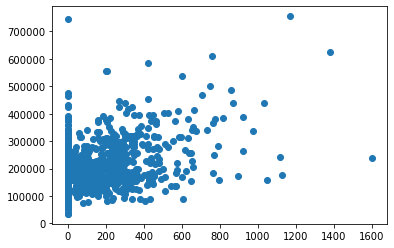

In [19]:
plt.scatter(df.MasVnrArea,df.SalePrice)

Text(0.5, 1.0, 'Veneer Area')

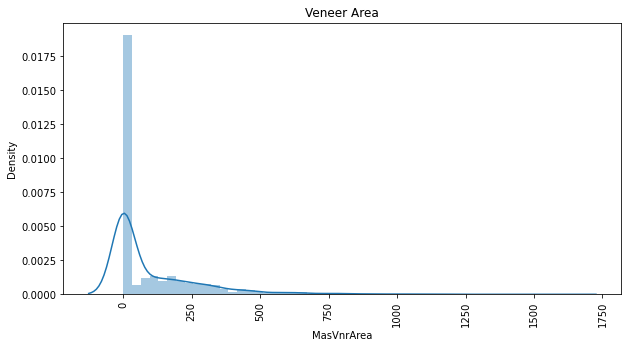

In [20]:
# plotting a distplot 
plt.figure(figsize = (10,5))
sns.distplot(df['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

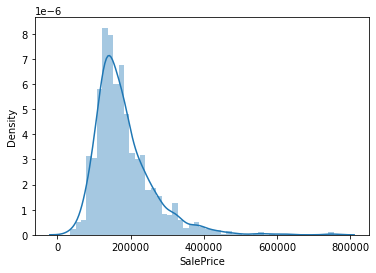

In [21]:
sns.distplot(df['SalePrice'])

In [22]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Basement Condition')

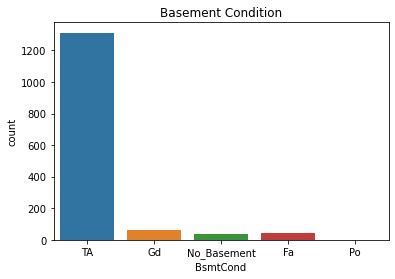

In [23]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= df)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

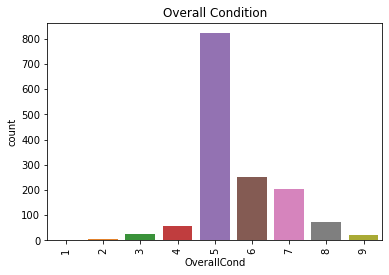

In [24]:
sns.countplot(x='OverallCond', data= df).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

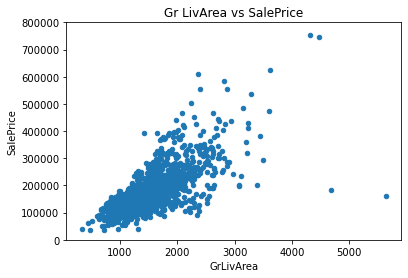

In [25]:
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

<AxesSubplot:xlabel='SalePrice'>

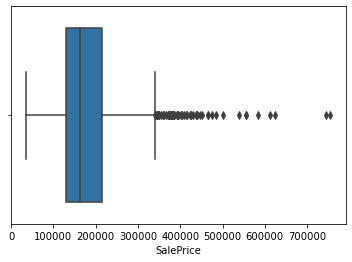

In [26]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=df)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

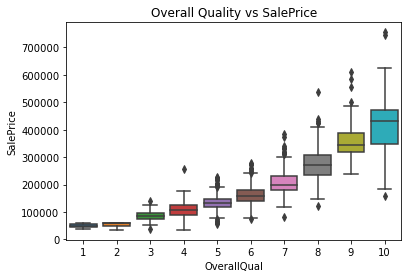

In [27]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Overall Quality vs SalePrice")

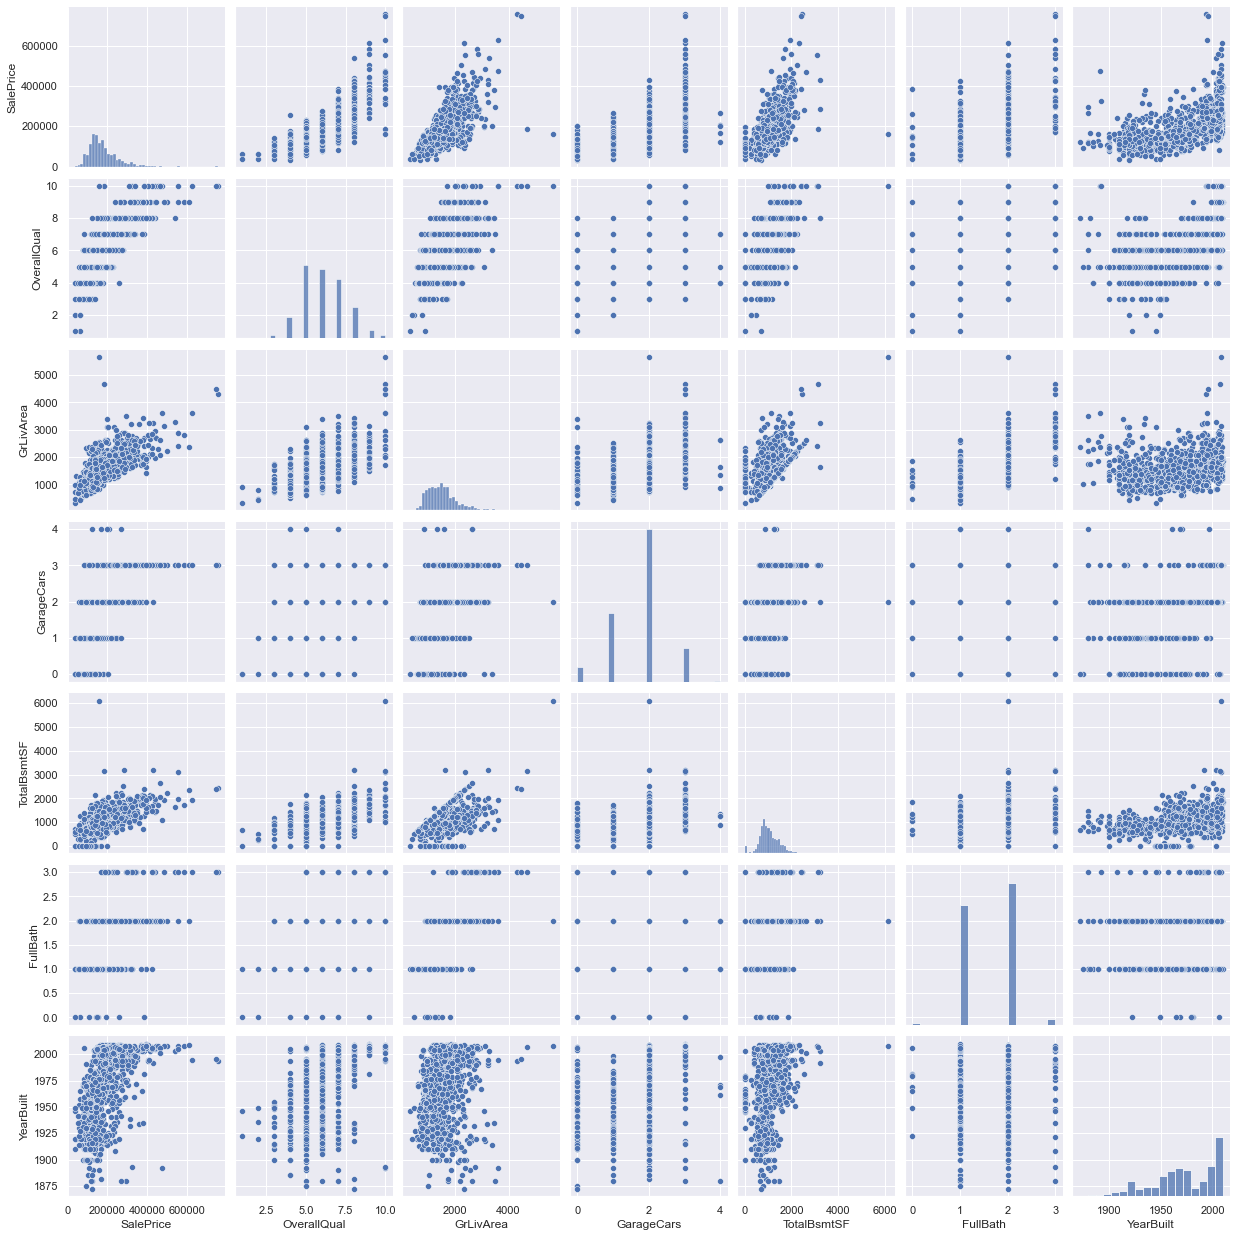

In [28]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Checking Correlation matrix ')

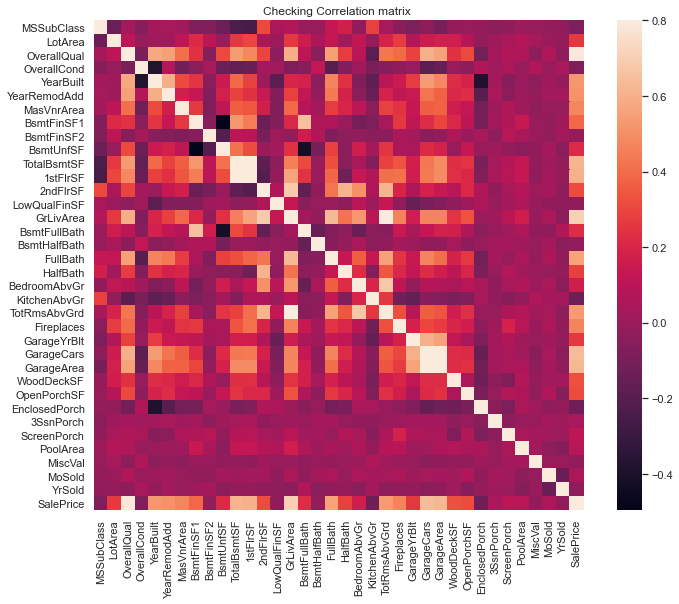

In [29]:
#checking the correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

In [30]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] # one or more

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

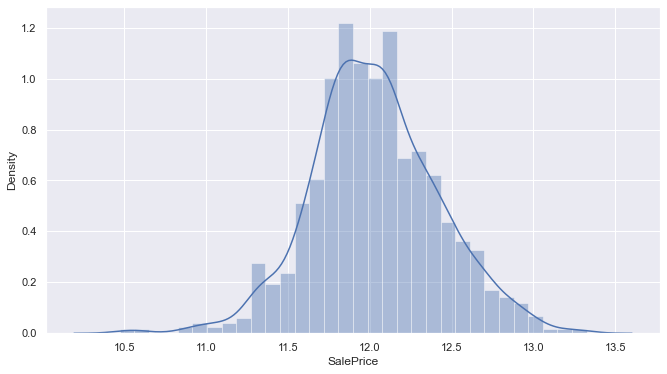

In [31]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(df["SalePrice"]))

## Step 4 : Data Preparation

In [32]:
numeric_data = df.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [33]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
df['Street'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

df['CentralAir'] = df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
df['PavedDrive'] = df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0) 

In [34]:
cat_values = df.select_dtypes(include=['object'])
cat_values.head()

MSZoning LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0       RL      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1       RL      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2       RL      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3       RL      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4       RL      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType  ... HeatingQC Electrical KitchenQual  \
0       Norm       Norm     1Fam  ...        Ex      SBrkr          Gd   
1      Feedr       Norm     1Fam  ...        Ex      SBrkr          TA   
2       Norm       Norm     1Fam  ...        Ex      SBrkr          Gd   
3       Norm       Norm     1Fam  ...        Gd      SBrkr          Gd   
4       Norm       Norm     1Fam  ...        Ex      SBrkr          Gd   

  Functional GarageType GarageFinish GarageQual GarageCond SaleType  \
0        Typ     Attchd          RFn         TA         TA       WD   
1        Typ     Attchd          RFn         TA         TA       WD   
2        Typ     Attchd          RFn         TA         TA       WD   
3        Typ     Detchd          Unf         TA         TA       WD   
4        Typ     Attchd          RFn         TA         TA       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 35 columns]

In [35]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                1  ...               0               0             0   
1                1  ...               0               0             0   
2                1  ...               0               0             0   
3                1  ...               0               0             0   
4                1  ...               0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 194 columns]

In [37]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [38]:
df.shape

(1334, 268)

In [39]:
# Droping the original categorical column
df = df.drop(list(cat_values.columns), axis=1)

In [40]:
df.shape

(1334, 233)

## Step 5 : Test-Train Split

In [41]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)
df_train.shape

(933, 233)

In [42]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [43]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [44]:
##   Scaling the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## Step 6 : Budiling the model 

### Linear Regression using RFE

In [45]:
## Building a Regression model.
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
# Calculating the RFE
rfe = RFE(lm, 30)
rfe = rfe.fit(X_train, y_train)

In [47]:
col=X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageCars',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Condition1_PosA', 'Foundation_Wood',
       'BsmtQual_No_Basement', 'BsmtCond_Po', 'BsmtExposure_No_Basement',
       'BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'Heating_Grav',
       'Electrical_Mix', 'GarageQual_Po', 'GarageCond_Gd', 'GarageCond_Po',
       'SaleType_Con', 'SaleType_ConLw', 'SaleType_Oth'],
      dtype='object')

In [48]:
lm1=lm.fit(X_train, y_train)

In [49]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

9.407006696396376
[-6.09211201e-02  2.30168432e-01 -3.07825416e-02  3.51733230e-01
  2.63590864e-01  2.08537399e-01  3.40082017e-02  2.78705898e-02
  1.85130299e-01  9.97194896e-02  6.35826551e-02  1.99278195e-01
  4.32004123e-02  2.95232615e-01  1.61990042e-01 -1.53210777e-14
  3.85407444e-01  5.02633121e-02 -3.92667123e-03  5.14929265e-02
  3.63703305e-02  4.19079717e-02  3.08052195e-14  3.91947689e-02
  3.43220535e-02  1.96060756e-04  1.30291789e-01  9.17296755e-02
  1.67786351e-02  3.74012188e-02  7.41990777e-02  2.11985775e-02
  2.91474516e-02  7.00871720e-02  9.02388399e-02  8.02530219e-02
  3.35509693e-03 -1.32216039e-02  6.35866005e-01  5.73426804e-01
  5.84114022e-01  5.69423068e-01 -6.26021555e-03  2.02220542e-02
  7.56092541e-03 -2.93302818e-03 -5.82094938e-02  4.45235971e-04
 -1.66533454e-15  3.30414677e-02 -1.72261535e-02 -9.69410525e-02
 -4.02856811e-03  7.89974061e-03 -6.84086740e-02 -1.07458450e-01
 -1.31461263e-01 -1.44876722e-02 -1.60634624e-02 -6.61736089e-02
  1.200

In [50]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9131596906308053
0.8965650290638009
11.766648557344878
6.998485412905515
0.012611627607014874
0.017452582077071108


### Ridge Regression

In [51]:
# list of alphas to tune


#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 3.0}
-0.07875225668672012


In [53]:
#cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=5]
#cv_results
# display the mean scores

ridge_cv_results = pd.DataFrame(model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=5]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
14         3.0         -0.062484        -0.078752                1
13         2.0         -0.060969        -0.078861                2
15         4.0         -0.063878        -0.079154                3
16         5.0         -0.065144        -0.079771                4
12         1.0         -0.059070        -0.079805                5
11         0.9         -0.058829        -0.079968                6
10         0.8         -0.058574        -0.080149                7
9          0.7         -0.058298        -0.080353                8
8          0.6         -0.058002        -0.080587               10
7          0.5         -0.057673        -0.080876               11
6          0.4         -0.057303        -0.081222               13
5          0.3         -0.056865        -0.081643               14
4          0.2         -0.056335        -0.082295               16
3          0.1         -0.055701        -0.083457               19
2         0.01         -0.054891        -0.087483               20
1        0.001         -0.054773        -0.088622               21
0       0.0001         -0.054762        -0.088770               22

In [54]:
# Optimal alpha for ridge model is .9 & building the model using alpha = .9
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.31156853e-02,  1.53645793e-01,  8.00243614e-02,  2.92419194e-01,
        2.03997385e-01,  9.57808077e-02,  5.27497874e-02,  4.04448089e-02,
        1.66618232e-01,  2.90760325e-02,  8.89429670e-02,  1.82257269e-01,
        5.65775539e-02,  2.24375542e-01,  1.31515923e-01,  0.00000000e+00,
        2.97586376e-01,  5.50997823e-02,  1.35451233e-03,  7.61615871e-02,
        5.18162366e-02,  4.60829938e-02,  0.00000000e+00,  1.21755721e-01,
        6.26030983e-02,  5.27743256e-05,  1.04844813e-01,  9.55778929e-02,
        1.18251552e-02,  3.83756039e-02,  6.70429329e-02,  1.38660092e-02,
        2.63209370e-02,  5.32107133e-02,  2.13738831e-02,  2.25674922e-02,
        6.76660124e-03, -1.24147767e-02,  1.08648964e-01,  5.89777137e-02,
        9.37941052e-02,  7.20416616e-02,  7.56110554e-03,  1.02262337e-02,
        4.37221225e-03,  5.84541796e-03, -3.24896091e-02, -6.02283880e-03,
        0.00000000e+00,  2.94315873e-02, -1.95862506e-02, -3.07803585e-02,
       -1.19461908e-02, -

In [55]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9448058745496415


In [56]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9196015550951995


In [57]:
# Printing the RMSE value
#mean_squared_error(y_test, y_test_pred)
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11647158093937206


In [58]:
# Put the Features and coefficients in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0                  MSSubClass      -0.0331
1                     LotArea       0.1536
2                      Street       0.0800
3                 OverallQual       0.2924
4                 OverallCond       0.2040
5                   YearBuilt       0.0958
6                YearRemodAdd       0.0527
7                  MasVnrArea       0.0404
8                  BsmtFinSF1       0.1666
9                  BsmtFinSF2       0.0291
10                  BsmtUnfSF       0.0889
11                TotalBsmtSF       0.1823
12                 CentralAir       0.0566
13                   1stFlrSF       0.2244
14                   2ndFlrSF       0.1315
15               LowQualFinSF       0.0000
16                  GrLivArea       0.2976
17               BsmtFullBath       0.0551
18               BsmtHalfBath       0.0014
19                   FullBath       0.0762
20                   HalfBath       0.0518
21               BedroomAbvGr       0.0461
22               KitchenAbvGr       0.0000
23               TotRmsAbvGrd       0.1218
24                 Fireplaces       0.0626
25                GarageYrBlt       0.0001
26                 GarageCars       0.1048
27                 GarageArea       0.0956
28                 PavedDrive       0.0118
29                 WoodDeckSF       0.0384
30                OpenPorchSF       0.0670
31              EnclosedPorch       0.0139
32                  3SsnPorch       0.0263
33                ScreenPorch       0.0532
34                   PoolArea       0.0214
35                    MiscVal       0.0226
36                     MoSold       0.0068
37                     YrSold      -0.0124
38                MSZoning_FV       0.1086
39                MSZoning_RH       0.0590
40                MSZoning_RL       0.0938
41                MSZoning_RM       0.0720
42               LotShape_IR2       0.0076
43               LotShape_IR3       0.0102
44               LotShape_Reg       0.0044
45            LandContour_HLS       0.0058
46            LandContour_Low      -0.0325
47            LandContour_Lvl      -0.0060
48           Utilities_NoSeWa       0.0000
49          LotConfig_CulDSac       0.0294
50              LotConfig_FR2      -0.0196
51              LotConfig_FR3      -0.0308
52           LotConfig_Inside      -0.0119
53              LandSlope_Mod      -0.0024
54              LandSlope_Sev      -0.0203
55       Neighborhood_Blueste      -0.0160
56        Neighborhood_BrDale      -0.0550
57       Neighborhood_BrkSide       0.0169
58       Neighborhood_ClearCr       0.0442
59       Neighborhood_CollgCr      -0.0206
60       Neighborhood_Crawfor       0.1447
61       Neighborhood_Edwards      -0.0650
62       Neighborhood_Gilbert      -0.0265
63        Neighborhood_IDOTRR      -0.0575
64       Neighborhood_MeadowV      -0.1167
65       Neighborhood_Mitchel      -0.0443
66         Neighborhood_NAmes      -0.0246
67       Neighborhood_NPkVill      -0.0030
68        Neighborhood_NWAmes      -0.0278
69       Neighborhood_NoRidge       0.0508
70       Neighborhood_NridgHt       0.0474
71       Neighborhood_OldTown      -0.0582
72         Neighborhood_SWISU      -0.0107
73        Neighborhood_Sawyer      -0.0058
74       Neighborhood_SawyerW      -0.0047
75       Neighborhood_Somerst       0.0238
76       Neighborhood_StoneBr       0.1085
77        Neighborhood_Timber      -0.0073
78       Neighborhood_Veenker       0.0273
79           Condition1_Feedr      -0.0106
80            Condition1_Norm       0.0570
81            Condition1_PosA      -0.0287
82            Condition1_PosN       0.0426
83            Condition1_RRAe      -0.0525
84            Condition1_RRAn       0.0365
85            Condition1_RRNe      -0.0066
86            Condition1_RRNn       0.0309
87            Condition2_Norm       0.0170
88            Condition2_PosN       0.0000
89            Condition2_RRNn      -0.0153
90            BldgType_2fmCon       0.0181
91            BldgType_Duplex       0.0070
92             BldgTyp

In [59]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9448058745496415
0.9196015550951995
7.478668389391485
5.439817295773196
0.008015721746400306
0.013565629166516697


### Lasso Regression

In [60]:
#lasso
#params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
#cv_results_l = pd.DataFrame(lasso_cv.cv_results_)
# cv_results
cv_results = pd.DataFrame(lasso_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.144527      0.044759         0.009671        0.005506      0.0001   
1       0.024478      0.008773         0.009373        0.007653       0.001   
2       0.024880      0.007557         0.002502        0.003069        0.01   
3       0.017959      0.006819         0.001302        0.002604        0.05   
4       0.016709      0.008648         0.000599        0.001199         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.070278          -0.082826          -0.081300   
1   {'alpha': 0.001}          -0.070258          -0.082830          -0.079393   
2    {'alpha': 0.01}          -0.123809          -0.118925          -0.124549   
3    {'alpha': 0.05}          -0.226491          -0.209942          -0.214034   
4     {'alpha': 0.1}          -0.289113          -0.261287          -0.262593   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.071163  ...        -0.077932        0.005960                1   
1          -0.076346  ...        -0.078182        0.004570                2   
2          -0.128412  ...        -0.124954        0.003655                3   
3          -0.221348  ...        -0.215998        0.006935                4   
4          -0.288296  ...        -0.273486        0.012530                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.059616           -0.057733           -0.058152   
1           -0.071998           -0.068532           -0.071287   
2           -0.119121           -0.117436           -0.120751   
3           -0.214791           -0.213818           -0.212912   
4           -0.270513           -0.275818           -0.275310   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.060999           -0.056377         -0.058576         0.001592  
1           -0.072341           -0.068972         -0.070626         0.001574  
2           -0.122204           -0.120348         -0.119972         0.001605  
3           -0.212069           -0.214746         -0.213667         0.001056  
4           -0.270683           -0.272445         -0.272954         0.002242  

[5 rows x 21 columns]

In [62]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.0779316964372967


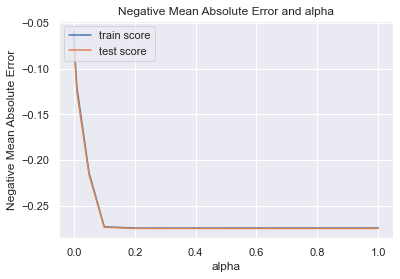

In [63]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [64]:
# lasso model with optimal alpha as .001
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [65]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9500578614821023


In [66]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9219591951050761


In [67]:
mean_squared_error(y_test, y_test_pred)

0.01316782458061956

In [68]:
# Put the Features and coefficients in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0                  MSSubClass      -0.0164
1                     LotArea       0.1950
2                      Street       0.1114
3                 OverallQual       0.3813
4                 OverallCond       0.2535
5                   YearBuilt       0.1972
6                YearRemodAdd       0.0393
7                  MasVnrArea       0.0193
8                  BsmtFinSF1       0.1033
9                  BsmtFinSF2       0.0173
10                  BsmtUnfSF       0.0000
11                TotalBsmtSF       0.3115
12                 CentralAir       0.0425
13                   1stFlrSF       0.0000
14                   2ndFlrSF       0.0000
15               LowQualFinSF       0.0000
16                  GrLivArea       0.6942
17               BsmtFullBath       0.0552
18               BsmtHalfBath       0.0000
19                   FullBath       0.0416
20                   HalfBath       0.0344
21               BedroomAbvGr       0.0210
22               KitchenAbvGr       0.0000
23               TotRmsAbvGrd       0.0505
24                 Fireplaces       0.0380
25                GarageYrBlt       0.0000
26                 GarageCars       0.1365
27                 GarageArea       0.0701
28                 PavedDrive       0.0081
29                 WoodDeckSF       0.0358
30                OpenPorchSF       0.0618
31              EnclosedPorch       0.0111
32                  3SsnPorch       0.0000
33                ScreenPorch       0.0533
34                   PoolArea       0.0000
35                    MiscVal       0.0000
36                     MoSold       0.0000
37                     YrSold      -0.0096
38                MSZoning_FV       0.4209
39                MSZoning_RH       0.3559
40                MSZoning_RL       0.3773
41                MSZoning_RM       0.3476
42               LotShape_IR2       0.0000
43               LotShape_IR3       0.0000
44               LotShape_Reg       0.0062
45            LandContour_HLS      -0.0000
46            LandContour_Low      -0.0403
47            LandContour_Lvl       0.0000
48           Utilities_NoSeWa       0.0000
49          LotConfig_CulDSac       0.0324
50              LotConfig_FR2      -0.0015
51              LotConfig_FR3      -0.0422
52           LotConfig_Inside      -0.0055
53              LandSlope_Mod      -0.0000
54              LandSlope_Sev      -0.0068
55       Neighborhood_Blueste      -0.0000
56        Neighborhood_BrDale      -0.0490
57       Neighborhood_BrkSide       0.0286
58       Neighborhood_ClearCr       0.0414
59       Neighborhood_CollgCr      -0.0134
60       Neighborhood_Crawfor       0.1654
61       Neighborhood_Edwards      -0.0565
62       Neighborhood_Gilbert      -0.0106
63        Neighborhood_IDOTRR      -0.0000
64       Neighborhood_MeadowV      -0.1166
65       Neighborhood_Mitchel      -0.0462
66         Neighborhood_NAmes      -0.0208
67       Neighborhood_NPkVill      -0.0000
68        Neighborhood_NWAmes      -0.0327
69       Neighborhood_NoRidge       0.0384
70       Neighborhood_NridgHt       0.0412
71       Neighborhood_OldTown      -0.0364
72         Neighborhood_SWISU      -0.0000
73        Neighborhood_Sawyer       0.0000
74       Neighborhood_SawyerW       0.0000
75       Neighborhood_Somerst       0.0000
76       Neighborhood_StoneBr       0.1096
77        Neighborhood_Timber      -0.0000
78       Neighborhood_Veenker       0.0135
79           Condition1_Feedr       0.0044
80            Condition1_Norm       0.0674
81            Condition1_PosA      -0.0457
82            Condition1_PosN       0.0541
83            Condition1_RRAe      -0.0659
84            Condition1_RRAn       0.0508
85            Condition1_RRNe       0.0000
86            Condition1_RRNn       0.0507
87            Condition2_Norm       0.0110
88            Condition2_PosN       0.0000
89            Condition2_RRNn      -0.0000
90            BldgType_2fmCon      -0.0000
91            BldgType_Duplex       0.0000
92             BldgTyp

In [69]:
lasso.coef_

array([-1.63542547e-02,  1.95043675e-01,  1.11395690e-01,  3.81286740e-01,
        2.53488444e-01,  1.97205102e-01,  3.93126581e-02,  1.92501018e-02,
        1.03296013e-01,  1.72730103e-02,  0.00000000e+00,  3.11490014e-01,
        4.24572892e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.94211034e-01,  5.52237926e-02,  0.00000000e+00,  4.15687437e-02,
        3.44409615e-02,  2.10197440e-02,  0.00000000e+00,  5.05428408e-02,
        3.79594495e-02,  4.83431991e-05,  1.36534182e-01,  7.00505730e-02,
        8.05970503e-03,  3.58275381e-02,  6.17564859e-02,  1.11001460e-02,
        0.00000000e+00,  5.33208915e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -9.63695366e-03,  4.20900627e-01,  3.55850550e-01,
        3.77338664e-01,  3.47554074e-01,  0.00000000e+00,  0.00000000e+00,
        6.15389993e-03, -0.00000000e+00, -4.03146105e-02,  0.00000000e+00,
        0.00000000e+00,  3.23975403e-02, -1.45708087e-03, -4.21908971e-02,
       -5.51978593e-03, -

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9500578614821023
0.9219591951050761
6.767037063905263
5.280297656828443
0.007252987206758052
0.01316782458061956


In [71]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.913160          0.944806          0.950058
1   R2 Score (Test)           0.896565          0.919602          0.921959
2       RSS (Train)          11.766649          7.478668          6.767037
3        RSS (Test)           6.998485          5.439817          5.280298
4       MSE (Train)           0.112302          0.089531          0.085164
5        MSE (Test)           0.132108          0.116472          0.114751

Evaluation of coefficients after regularization

In [72]:
betas = pd.DataFrame(index=X_train.columns)

In [73]:
betas.rows = X_train.columns

In [74]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [75]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge     Lasso
MSSubClass           -0.033116 -0.016354
LotArea               0.153646  0.195044
Street                0.080024  0.111396
OverallQual           0.292419  0.381287
OverallCond           0.203997  0.253488
YearBuilt             0.095781  0.197205
YearRemodAdd          0.052750  0.039313
MasVnrArea            0.040445  0.019250
BsmtFinSF1            0.166618  0.103296
BsmtFinSF2            0.029076  0.017273
BsmtUnfSF             0.088943  0.000000
TotalBsmtSF           0.182257  0.311490
CentralAir            0.056578  0.042457
1stFlrSF              0.224376  0.000000
2ndFlrSF              0.131516  0.000000
LowQualFinSF          0.000000  0.000000
GrLivArea             0.297586  0.694211
BsmtFullBath          0.055100  0.055224
BsmtHalfBath          0.001355  0.000000
FullBath              0.076162  0.041569
HalfBath              0.051816  0.034441
BedroomAbvGr          0.046083  0.021020
KitchenAbvGr          0.000000  0.000000
TotRmsAbvGrd          0.121756  0.050543
Fireplaces            0.062603  0.037959
GarageYrBlt           0.000053  0.000048
GarageCars            0.104845  0.136534
GarageArea            0.095578  0.070051
PavedDrive            0.011825  0.008060
WoodDeckSF            0.038376  0.035828
OpenPorchSF           0.067043  0.061756
EnclosedPorch         0.013866  0.011100
3SsnPorch             0.026321  0.000000
ScreenPorch           0.053211  0.053321
PoolArea              0.021374  0.000000
MiscVal               0.022567  0.000000
MoSold                0.006767  0.000000
YrSold               -0.012415 -0.009637
MSZoning_FV           0.108649  0.420901
MSZoning_RH           0.058978  0.355851
MSZoning_RL           0.093794  0.377339
MSZoning_RM           0.072042  0.347554
LotShape_IR2          0.007561  0.000000
LotShape_IR3          0.010226  0.000000
LotShape_Reg          0.004372  0.006154
LandContour_HLS       0.005845 -0.000000
LandContour_Low      -0.032490 -0.040315
LandContour_Lvl      -0.006023  0.000000
Utilities_NoSeWa      0.000000  0.000000
LotConfig_CulDSac     0.029432  0.032398
LotConfig_FR2        -0.019586 -0.001457
LotConfig_FR3        -0.030780 -0.042191
LotConfig_Inside     -0.011946 -0.005520
LandSlope_Mod        -0.002431 -0.000000
LandSlope_Sev        -0.020283 -0.006820
Neighborhood_Blueste -0.016046 -0.000000
Neighborhood_BrDale  -0.054983 -0.049007
Neighborhood_BrkSide  0.016944  0.028584
Neighborhood_ClearCr  0.044189  0.041403
Neighborhood_CollgCr -0.020607 -0.013413
Neighborhood_Crawfor  0.144672  0.165352
Neighborhood_Edwards -0.065004 -0.056453
Neighborhood_Gilbert -0.026500 -0.010611
Neighborhood_IDOTRR  -0.057493 -0.000000
Neighborhood_MeadowV -0.116711 -0.116642
Neighborhood_Mitchel -0.044261 -0.046177
Neighborhood_NAmes   -0.024600 -0.020805
Neighborhood_NPkVill -0.003025 -0.000000

Additional observations related to Problem Statement - Part 2

From Q1. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso

In [76]:
# If we double the optimal value of alpha for ridge from 3 to 

ridge_6 = Ridge(alpha = 6.0)
ridge_6.fit(X_train,y_train)

y_pred_train = ridge_6.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge_6.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9390929739009403
0.9177868972021397


In [77]:
# # If we double the optimal value of alpha for lasso from .0001 to .0002

lasso_0002 = Lasso(alpha=0.0002)
lasso_0002.fit(X_train,y_train)

y_train_pred = lasso_0002.predict(X_train)
y_test_pred = lasso_0002.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.945792751905757
0.9264441714816845


From Q1. What will be the most important predictor variables after the change is implemented?

In [78]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['ridge_6'] = ridge_6.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['lasso_0002'] = lasso_0002.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

ridge_6     Ridge     Lasso  lasso_0002
MSSubClass           -0.035509 -0.033116 -0.016354   -0.014370
LotArea               0.128973  0.153646  0.195044    0.182637
Street                0.055507  0.080024  0.111396    0.081384
OverallQual           0.248856  0.292419  0.381287    0.399292
OverallCond           0.171093  0.203997  0.253488    0.255178
YearBuilt             0.067931  0.095781  0.197205    0.173352
YearRemodAdd          0.060869  0.052750  0.039313    0.043833
MasVnrArea            0.046262  0.040445  0.019250    0.014932
BsmtFinSF1            0.149709  0.166618  0.103296    0.101902
BsmtFinSF2            0.018556  0.029076  0.017273    0.000007
BsmtUnfSF             0.088790  0.088943  0.000000    0.000000
TotalBsmtSF           0.167425  0.182257  0.311490    0.318676
CentralAir            0.059490  0.056578  0.042457    0.045922
1stFlrSF              0.199313  0.224376  0.000000    0.000000
2ndFlrSF              0.115907  0.131516  0.000000    0.000000
LowQualFinSF          0.000000  0.000000  0.000000    0.000000
GrLivArea             0.263835  0.297586  0.694211    0.723045
BsmtFullBath          0.056124  0.055100  0.055224    0.056951
BsmtHalfBath          0.000731  0.001355  0.000000    0.000000
FullBath              0.077060  0.076162  0.041569    0.034046
HalfBath              0.051689  0.051816  0.034441    0.031730
BedroomAbvGr          0.051795  0.046083  0.021020    0.004713
KitchenAbvGr          0.000000  0.000000  0.000000    0.000000
TotRmsAbvGrd          0.131180  0.121756  0.050543    0.053383
Fireplaces            0.077192  0.062603  0.037959    0.043725
GarageYrBlt           0.000054  0.000053  0.000048    0.000043
GarageCars            0.102897  0.104845  0.136534    0.141959
GarageArea            0.093064  0.095578  0.070051    0.059929
PavedDrive            0.012945  0.011825  0.008060    0.008291
WoodDeckSF            0.037954  0.038376  0.035828    0.032917
OpenPorchSF           0.067948  0.067043  0.061756    0.054899
EnclosedPorch         0.015823  0.013866  0.011100    0.005245
3SsnPorch             0.022139  0.026321  0.000000    0.000000
ScreenPorch           0.049460  0.053211  0.053321    0.048555
PoolArea              0.011452  0.021374  0.000000    0.000000
MiscVal               0.012342  0.022567  0.000000    0.000000
MoSold                0.009270  0.006767  0.000000    0.000000
YrSold               -0.012812 -0.012415 -0.009637   -0.009010
MSZoning_FV           0.072325  0.108649  0.420901    0.257957
MSZoning_RH           0.027939  0.058978  0.355851    0.188737
MSZoning_RL           0.066960  0.093794  0.377339    0.222801
MSZoning_RM           0.031328  0.072042  0.347554    0.187915
LotShape_IR2          0.008247  0.007561  0.000000    0.000000
LotShape_IR3          0.007188  0.010226  0.000000    0.000000
LotShape_Reg          0.001663  0.004372  0.006154    0.004487
LandContour_HLS       0.010035  0.005845 -0.000000    0.000000
LandContour_Low      -0.022954 -0.032490 -0.040315   -0.027581
LandContour_Lvl      -0.005968 -0.006023  0.000000    0.000000
Utilities_NoSeWa      0.000000  0.000000  0.000000    0.000000
LotConfig_CulDSac     0.027964  0.029432  0.032398    0.029018
LotConfig_FR2        -0.017807 -0.019586 -0.001457   -0.000000
LotConfig_FR3        -0.016466 -0.030780 -0.042191   -0.000000
LotConfig_Inside     -0.013574 -0.011946 -0.005520   -0.008113
LandSlope_Mod        -0.003184 -0.002431 -0.000000   -0.000000
LandSlope_Sev        -0.015904 -0.020283 -0.006820   -0.000000
Neighborhood_Blueste -0.006514 -0.016046 -0.000000   -0.000000
Neighborhood_BrDale  -0.037548 -0.054983 -0.049007   -0.025083
Neighborhood_BrkSide  0.012720  0.016944  0.028584    0.019707
Neighborhood_ClearCr  0.038497  0.044189  0.041403    0.034630
Neighborhood_CollgCr -0.020891 -0.020607 -0.013413   -0.007618
Neighborhood_Crawfor  0.130700  0.144672  0.165352    0.153281
Neighborhood_Edwards -0.062230 -0.065004 -0.056453   -0.049397
Neighborhood_Gilbert -0.032835 -0.026500 -0.010611   -

From Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [79]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=232)

MSSubClass, LotArea, Street, OverallQual, OverCond are the 5 most important variables. We need to drop them as per the question

In [80]:
X_train_vardrop = X_train.drop(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond'],axis=1)
X_test_vardrop = X_test.drop(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond'],axis=1)
X_train_vardrop.head()

YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
64     0.900000      0.800000    0.513901    0.337751    0.000000   0.147701   
735    0.261538      0.333333    0.000000    0.178245    0.000000   0.227589   
373    0.561538      0.050000    0.000000    0.195612    0.185185   0.000000   
466    0.692308      0.333333    0.000000    0.355576    0.000000   0.231770   
1025   0.707692      0.366667    0.000000    0.063071    0.481481   0.128193   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
64       0.329694         1.0  0.249827  0.606456  ...               0   
735      0.274485         0.0  0.188666  0.551210  ...               0   
373      0.189644         1.0  0.340359  0.000000  ...               0   
466      0.398316         1.0  0.325847  0.000000  ...               0   
1025     0.275109         1.0  0.189357  0.000000  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
64                 0             0             0            1   
735                0             0             0            1   
373                0             0             0            1   
466                0             0             0            1   
1025               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
64                        0                     0                     0   
735                       0                     0                     0   
373                       0                     0                     0   
466                       0                     0                     0   
1025                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
64                       1                      0  
735                      1                      0  
373                      1                      0  
466                      1                      0  
1025                     1                      0  

[5 rows x 227 columns]

Lasso 

In [81]:
# alpha .0001
lasso_drop5 = Lasso(alpha=.0001)
lasso_drop5.fit(X_train_vardrop, y_train) 

Lasso(alpha=0.0001)

In [82]:
y_train_pred = lasso_drop5.predict(X_train_vardrop)
y_test_pred = lasso_drop5.predict(X_test_vardrop)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9415239483698781
0.9055219714317599


In [83]:
#important predictor variables
betas = pd.DataFrame(index=X_train_vardrop.columns)
betas.rows = X_train.columns
betas['lasso_drop5'] = lasso_drop5.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

lasso_drop5
YearBuilt                0.116230
YearRemodAdd             0.077434
MasVnrArea               0.024843
BsmtFinSF1               0.106708
BsmtFinSF2               0.000000
BsmtUnfSF                0.000000
TotalBsmtSF              0.333276
CentralAir               0.066117
1stFlrSF                 0.000000
2ndFlrSF                 0.000000
LowQualFinSF             0.000000
GrLivArea                0.794188
BsmtFullBath             0.040473
BsmtHalfBath             0.009498
FullBath                 0.019727
HalfBath                 0.014346
BedroomAbvGr             0.023913
KitchenAbvGr             0.000000
TotRmsAbvGrd             0.063010
Fireplaces               0.047452
GarageYrBlt              0.000077
GarageCars               0.124618
GarageArea               0.072635
PavedDrive              -0.008423
WoodDeckSF               0.052043
OpenPorchSF              0.069246
EnclosedPorch            0.003480
3SsnPorch                0.018541
ScreenPorch              0.053877
PoolArea                 0.000000
MiscVal                  0.070463
MoSold                  -0.000000
YrSold                   0.000000
MSZoning_FV              0.500225
MSZoning_RH              0.432713
MSZoning_RL              0.465899
MSZoning_RM              0.444316
LotShape_IR2             0.011624
LotShape_IR3             0.008354
LotShape_Reg             0.002930
LandContour_HLS          0.011515
LandContour_Low         -0.039442
LandContour_Lvl         -0.012178
Utilities_NoSeWa         0.000000
LotConfig_CulDSac        0.035326
LotConfig_FR2           -0.025195
LotConfig_FR3           -0.000000
LotConfig_Inside        -0.013575
LandSlope_Mod           -0.012959
LandSlope_Sev           -0.030346
Neighborhood_Blueste    -0.000000
Neighborhood_BrDale     -0.055819
Neighborhood_BrkSide     0.025417
Neighborhood_ClearCr     0.044040
Neighborhood_CollgCr    -0.013638
Neighborhood_Crawfor     0.196621
Neighborhood_Edwards    -0.078647
Neighborhood_Gilbert    -0.003810
Neighborhood_IDOTRR     -0.007043
Neighborhood_MeadowV    -0.177919
Neighborhood_Mitchel    -0.043622
Neighborhood_NAmes      -0.016278
Neighborhood_NPkVill     0.000000
Neighborhood_NWAmes     -0.000000
Neighborhood_NoRidge     0.043815
Neighborhood_NridgHt     0.060529
Neighborhood_OldTown    -0.040706
Neighborhood_SWISU      -0.000493

                                            ----END OF THE DOCUMENT----